## Задача 2.3

In [84]:
%matplotlib inline  
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import math

В качестве распределения у которого конечны первые 4 момента, а 5 нет возьмем распредление Парето с параметром равным 5 и сгенерируем выборку размера $N = 10000$:
(Не имеет моментов больших, либо равных параметру)

In [85]:
pareto = st.pareto(5, loc=0, scale=1)
sample = pareto.rvs(size=10000)

### Построим график плотности и нанесем на него точки выборки

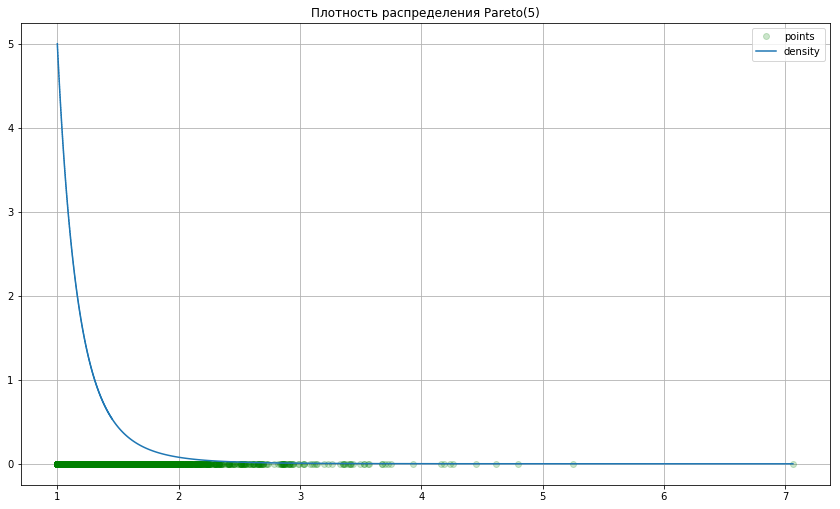

In [86]:
z = np.linspace(min(sample), max(sample), 10000)
plt.plot(sample, np.zeros(10000), 'go', alpha = 0.2, label='points')
plt.step(z, pareto.pdf(z), label='density')
plt.title (r'Плотность распределения Pareto(5)' )
fig = plt.gcf()
plt.grid(True)
plt.legend()
fig.set_size_inches(14.5, 8.5)

In [87]:
sv = np.zeros(10001)
for n in range(1,10001):
    sv[n] = st.moment(sample[:n], 2)

### Построим график зависимости модуля разности оценки дисперсии и его истинного значения от $n$.

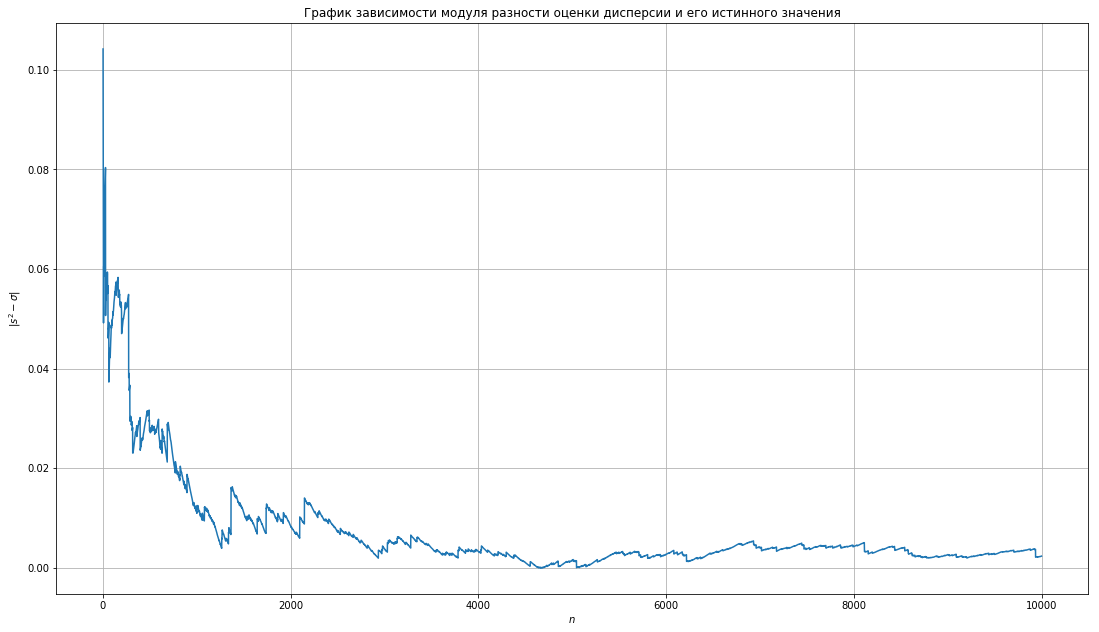

In [88]:
plt.plot(np.arange(1,10001), abs(sv - pareto.var())[1:])
plt.grid(True) #Сетка
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.xlabel(r'$n$')
plt.ylabel(r'$| s^2 - \sigma |$')
plt.title (r'График зависимости модуля разности оценки дисперсии и его истинного значения' )
plt.show()

На графике видно, что наша оценка сходится.
Так как дисперсия конечна, то сходитя выборочная дисперсия нашего распределения к ее теоретическому значению.

Аналогичное исследование проведем для выборки из распределения Коши

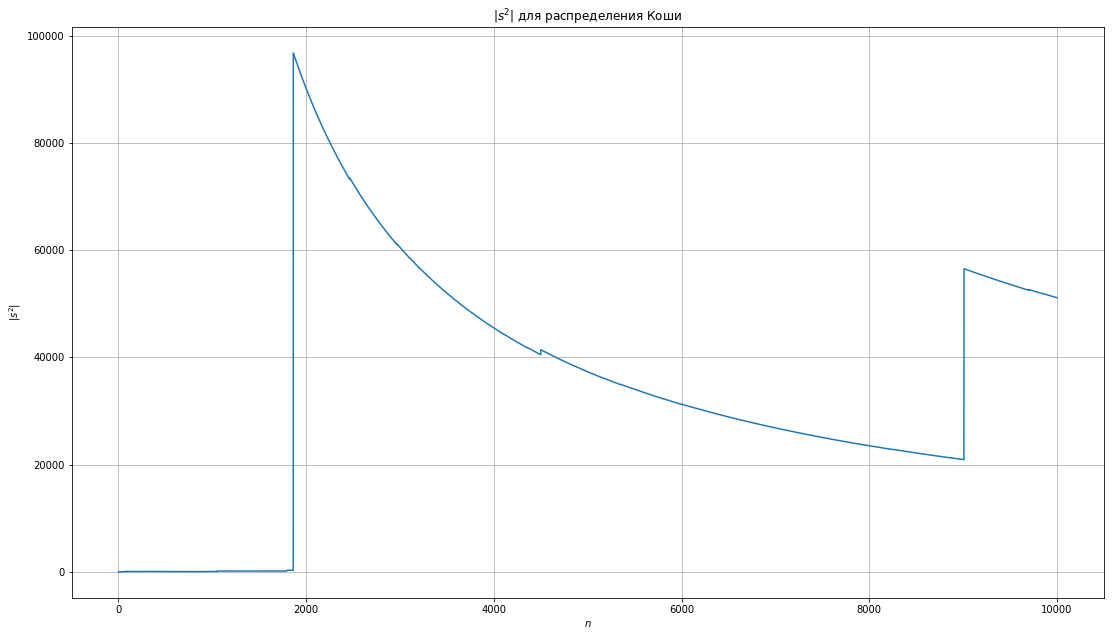

In [89]:
cauchy = st.cauchy.rvs(loc=0, size=10000)
sv_c = np.zeros(10001)
for n in range(1,10001):
    sv_c[n] = st.moment(cauchy[:n], 2)
plt.plot(np.arange(1,10001), np.abs(sv_c)[1:])
plt.grid(True)
fig = plt.gcf()
plt.xlabel(r'$n$')
plt.ylabel(r'$| s^2|$')
plt.title (r'$| s^2|$ для распределения Коши' )
fig.set_size_inches(18.5, 10.5)
plt.show()

Как видно из графика при больших $n$ сходимости нашей выборочной дисперсии нет, есть резкие подъемы, и так как распределение Коши имеет бесконечную дисперсию следовательно это статистика не сходится.

### Вывод

Убеждаемся в свойстве выборочной дисперсии

Выборочная дисперсия является состоятельной оценкой теоретической дисперсии. Если $ \mathrm{D}[X_i] = \sigma^2 < \infty $, то
$ S_n^2 \to^{\!\!\!\!\!\!\mathbb{P}}\; \sigma^2 $
